# Regression to the mean

Students take a standard exam at two time points. Getting two grades.

If the 1'st grade is <font style="color:red;">higher</font> than the average, the 2'nd grade will tend to be <font style="color:blue;">lower</font> than the 1'st.

If the 1'st grade is <font style="color:blue;">lower</font> than the average, the 2'nd grade will tend to be <font style="color:red;">higher</font> than the 1'st.

This happens even if the two grades are **statistically independent**.

This is called **regression to the mean**

In [1]:
%pylab inline
import pandas as pd
import numpy as np
from numpy import arange,array,ones,linalg

Populating the interactive namespace from numpy and matplotlib


This notebook is a an intuitive introduction to the concept of linear regression. Partially based on Chapter 10 in the book [**Statistics** by Freedman, Pisani and Purves](https://www.amazon.com/Statistics-4th-David-Freedman/dp/0393929728) 

## Fathers and Sons

A classical example of regression to the mean involves the height of fathers and sons.

We take our data from here http://www.math.uah.edu/stat/data/Pearson.html

In [2]:
HH=pd.read_csv('data/Pearson.csv')
HH.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


In [3]:
# Copute some basic descritive statistics.
HH.describe()

,Father,Son
count,1078.000000,1078.000000
mean,67.686827,68.684230
std,2.745827,2.816194
min,59.000000,58.500000
25%,65.800000,66.900000
50%,67.800000,68.600000
75%,69.600000,70.500000
max,75.400000,78.400000


In [4]:
A=np.array(HH['Father'])
A=np.array([ones(len(A)),A])
y=np.array(HH['Son'])
A.shape,y.shape

w1 = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
print("The regression function from father's height to to son's height is")
print("son's height = %f + %f * father's height"%(w1[0],w1[1]))

The regression function from father's height to to son's height is
son's height = 33.892801 + 0.514006 * father's height


/Users/roepkeb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [5]:
def f(x,w):
    return w[0]+w[1]*x

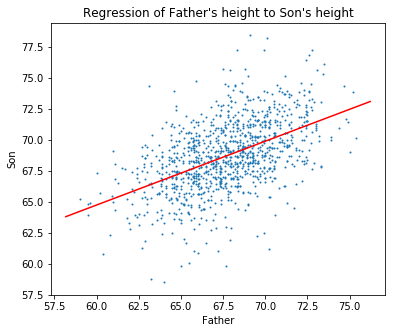

In [6]:
ax=HH.plot(kind='scatter',s=1,x='Father',y='Son',figsize=[6,5]);
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r');
title("Regression of Father's height to Son's height");

Note that as father's height varies from 58" to 77" the son's height varies only from 63" to 72"

In [7]:
HH['Son-Father']=HH['Son']-HH['Father']

In [8]:
A=np.array(HH['Father'])
A=np.array([ones(len(A)),A])
y=np.array(HH['Son-Father'])
A.shape,y.shape

w2 = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
w2

/Users/roepkeb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([33.89280054, -0.48599409])

## Consider the difference

Regression to the mean is even more evident when we compare the height of the father to the **difference** between the heights of the son and the father.

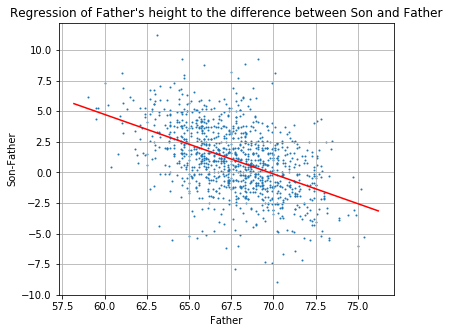

In [9]:
ax=HH.plot(kind='scatter',s=1,x='Father',y='Son-Father',figsize=[6,5]);
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w2),f(x1,w2)],'r');
grid()
title("Regression of Father's height to the difference between Son and Father");

## Conclusions

Suppose you have a pair of IID random variables $X_1,X_2$. If you select pairs $x_1,x_2$ such that $x_1$ is far from the mean of the distribution, then $x_2$ for those pairs will tend to be closer to the mean. 